<a href="https://colab.research.google.com/github/anweshasuara03-bot/Major-Project/blob/main/Majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Disease Prediction Using Machine Learning Classification Models**

-Anwesha Suara

**Problem Statement**

Heart disease remains one of the leading causes of death worldwide. Early and
accurate prediction can significantly improve patient outcomes and reduce
mortality. Traditional diagnosis methods are time-consuming and often require
expensive tests.
Given a set of medical parameters collected from patients—such as age, sex,
chest pain type, cholesterol level, blood pressure, ECG results, and more—can we
develop a machine learning model that accurately classifies whether a patient is
likely to have heart disease?
The goal is to build and compare several classification models such as Logistic
Regression, Decision Tree, Random Forest, and AI-based methods (e.g., Neural
Networks) to predict the presence of heart disease based on the given features.

**Objective**

To develop a supervised classification model that predicts whether a patient
has heart disease (target: 0 or 1).
To compare the performance of multiple models:
Logistic Regression
Decision Tree
Random Forest
AI model (e.g., simple Feedforward Neural Network)
To evaluate models using classification metrics: Accuracy, Precision, Recall,
F1-Score, ROC-AUC.
Heart Disease Prediction Using Machine Learning Classification Models 1
To interpret feature importance and understand key factors contributing to
heart disease.

**ML Pipeline Overview**

1.**Data Understanding & Cleaning**

Handle missing values (if any)
Encode categorical variables (e.g., cp, thal )
Normalise/scale numeric features


2.**Exploratory Data Analysis (EDA)**

Visualize distributions, correlations
Understand relationships between features and target

3.**Model Building**

Train/test split or cross-validation
Train classification models (Logistic Regression, Decision Tree, etc.)
Hyperparameter tuning using GridSearchCV/RandomizedSearchCV

4.**Model Evaluation**

Use metrics like accuracy, confusion matrix, ROC-AUC
Compare model performance

5.**Deployment (Optional)**

Build a simple interface using Streamlit or Flask for predictions

**Target Audience**

Hospitals and clinics for pre-screening patients
Health insurance providers for risk assessment
Data scientists and healthcare professionals interested in preventive analytics

In [33]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [34]:
!pip install tensorflow

In [17]:
df = pd.read_csv('heart.csv')
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

Shape: (303, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [49]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [22]:
numeric_cols_all = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_all = df.select_dtypes(include=['object']).columns.tolist()

for col in numeric_cols_all:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols_all:
    df[col] = df[col].fillna(df[col].mode()[0])

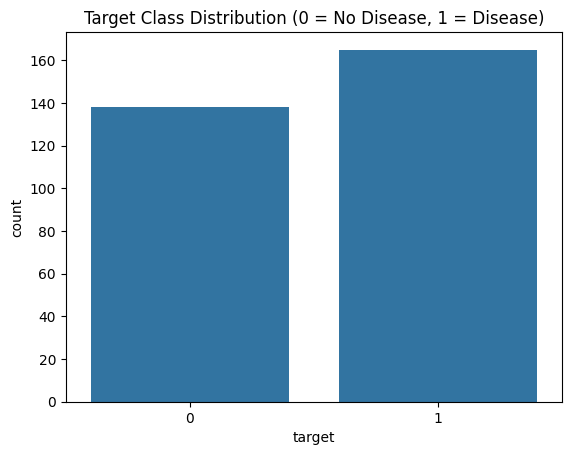

In [33]:
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution (0 = No Disease, 1 = Disease)")
plt.show()

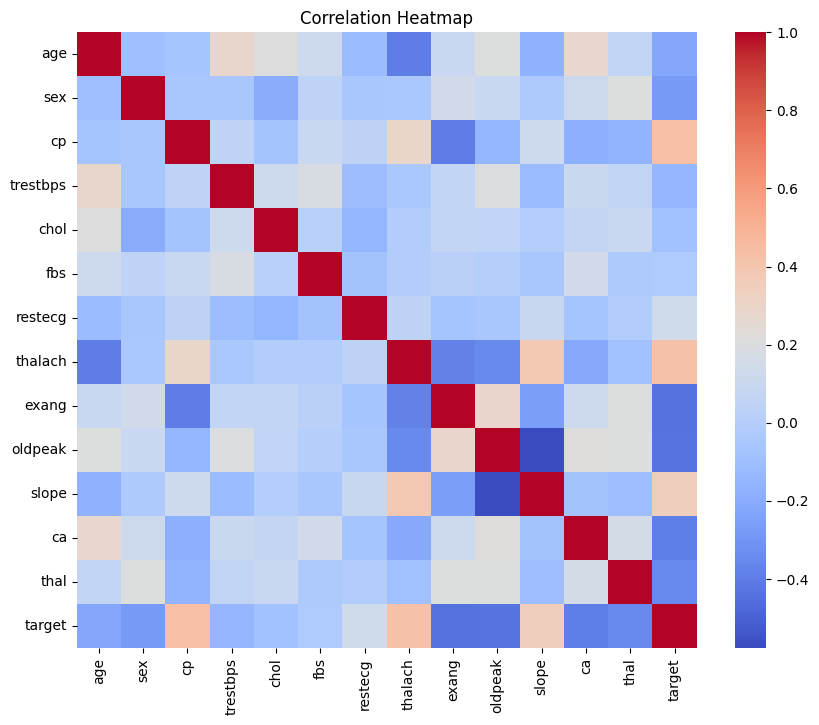

In [23]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


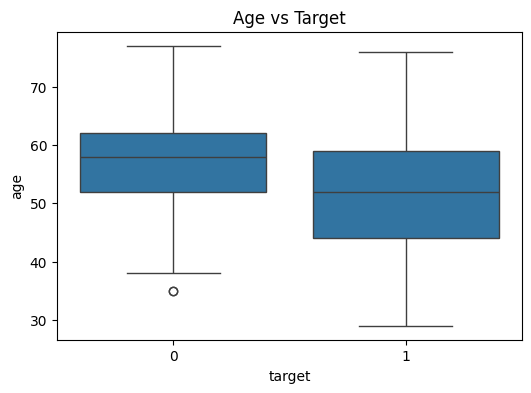

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Target")
plt.show()


In [25]:
target_col = 'target'   # when the change if different

X = df.drop(target_col, axis=1)
y = df[target_col]


In [26]:
X = df.drop('target', axis=1)
# Categorical columns (if present)
possible_cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_cols = [col for col in possible_cat_cols if col in X.columns]

# Numeric = rest of columns
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print("Numeric columns :", numeric_cols)
print("Categorical cols:", categorical_cols)


Numeric columns : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical cols: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [27]:
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps same proportion of classes
)

In [28]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [29]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"===== {name} =====")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC  : {auc:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


In [30]:
log_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)
evaluate_model("Logistic Regression", log_reg, X_test, y_test)


===== Logistic Regression =====
Accuracy : 0.8689
Precision: 0.8571
Recall   : 0.9091
F1-score : 0.8824
ROC-AUC  : 0.9102

Confusion Matrix:
[[23  5]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61





In [31]:
dtree = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

dtree.fit(X_train, y_train)
evaluate_model("Decision Tree", dtree, X_test, y_test)


===== Decision Tree =====
Accuracy : 0.7541
Precision: 0.7647
Recall   : 0.7879
F1-score : 0.7761
ROC-AUC  : 0.7511

Confusion Matrix:
[[20  8]
 [ 7 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61





In [32]:
rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)
evaluate_model("Random Forest (default)", rf, X_test, y_test)


===== Random Forest (default) =====
Accuracy : 0.8197
Precision: 0.7750
Recall   : 0.9394
F1-score : 0.8493
ROC-AUC  : 0.9167

Confusion Matrix:
[[19  9]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61





In [35]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5]
}

rf_gs = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

rf_gs.fit(X_train, y_train)

print("Best parameters:", rf_gs.best_params_)

best_rf = rf_gs.best_estimator_
evaluate_model("Random Forest (GridSearch)", best_rf, X_test, y_test)


Best parameters: {'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
===== Random Forest (GridSearch) =====
Accuracy : 0.8197
Precision: 0.7750
Recall   : 0.9394
F1-score : 0.8493
ROC-AUC  : 0.9145

Confusion Matrix:
[[19  9]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61





In [38]:
# Fit preprocessor on training data only
preprocessor.fit(X_train)

X_train_nn = preprocessor.transform(X_train)
X_test_nn = preprocessor.transform(X_test)

input_dim = X_train_nn.shape[1]
input_dim



30

In [39]:
tf.random.set_seed(42)

model = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

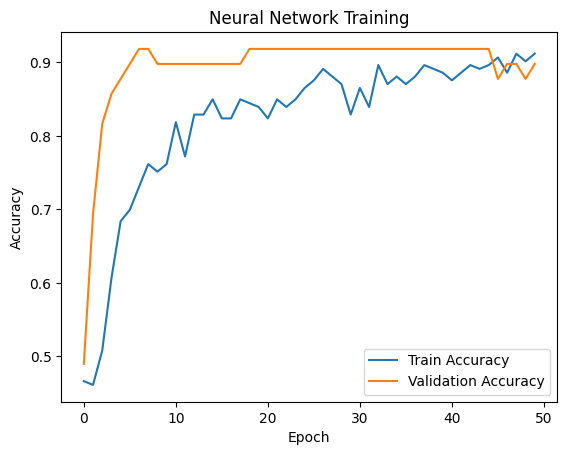

In [40]:
history = model.fit(
    X_train_nn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0
)

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network Training')
plt.legend()
plt.show()


In [41]:
y_proba_nn = model.predict(X_test_nn).ravel()
y_pred_nn = (y_proba_nn >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_nn)
prec = precision_score(y_test, y_pred_nn)
rec = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)
auc = roc_auc_score(y_test, y_proba_nn)

print("===== Neural Network =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
===== Neural Network =====
Accuracy : 0.8361
Precision: 0.8286
Recall   : 0.8788
F1-score : 0.8529
ROC-AUC  : 0.8918

Confusion Matrix:
[[22  6]
 [ 4 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [42]:
results = []

def collect_metrics(name, y_true, y_pred, y_proba=None):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_proba) if y_proba is not None else np.nan
    }

# Logistic Regression
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]
results.append(collect_metrics("Logistic Regression", y_test, y_pred, y_proba))

# Decision Tree
y_pred = dtree.predict(X_test)
y_proba = dtree.predict_proba(X_test)[:, 1]
results.append(collect_metrics("Decision Tree", y_test, y_pred, y_proba))

# Random Forest (Best from GridSearch)
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]
results.append(collect_metrics("Random Forest (GS)", y_test, y_pred, y_proba))

# Neural Network
results.append(collect_metrics("Neural Network", y_test, y_pred_nn, y_proba_nn))

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.868852,0.857143,0.909091,0.882353,0.910173
1,Decision Tree,0.754098,0.764706,0.787879,0.776119,0.751082
2,Random Forest (GS),0.819672,0.775000,0.939394,0.849315,0.914502
3,Neural Network,0.836066,0.828571,0.878788,0.852941,0.891775


In [43]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results_df)

https://docs.google.com/spreadsheets/d/17CKqfrpgQ2a10TPaxHmrFjLTtoB1G2ISu__q0bNOhZc/edit#gid=0


In [50]:
# Get transformed feature names
ohe = log_reg.named_steps['preprocess'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

all_feature_names = np.concatenate([numeric_cols, ohe_feature_names])

coef = log_reg.named_steps['clf'].coef_[0]

feature_importance_lr = pd.DataFrame({
    'feature': all_feature_names,
    'coef': coef,
    'abs_coef': np.abs(coef)
}).sort_values(by='abs_coef', ascending=False)

feature_importance_lr.head(15)


,feature,coef,abs_coef
7,cp_0,-1.175387,1.175387
21,ca_0,1.036266,1.036266
23,ca_2,-0.853149,0.853149
29,thal_3,-0.849274,0.849274
28,thal_2,0.732014,0.732014
9,cp_2,0.659189,0.659189
10,cp_3,0.655381,0.655381
5,sex_0,0.614089,0.614089
6,sex_1,-0.584031,0.584031
22,ca_1,-0.560114,0.560114


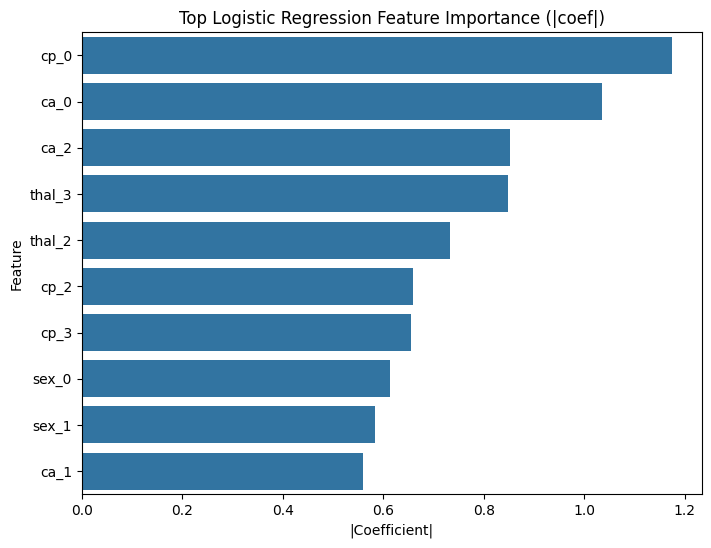

In [51]:
plt.figure(figsize=(8,6))
top = feature_importance_lr.head(10)
sns.barplot(data=top, x='abs_coef', y='feature')
plt.title("Top Logistic Regression Feature Importance (|coef|)")
plt.xlabel("|Coefficient|")
plt.ylabel("Feature")
plt.show()


In [52]:
rf_clf = best_rf.named_steps['clf']
importances = rf_clf.feature_importances_

feature_importance_rf = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_rf.head(15)


,feature,importance
7,cp_0,0.132064
28,thal_2,0.116208
4,oldpeak,0.092722
29,thal_3,0.088436
3,thalach,0.076412
21,ca_0,0.067591
17,exang_1,0.049489
16,exang_0,0.045430
0,age,0.044758
20,slope_2,0.044400


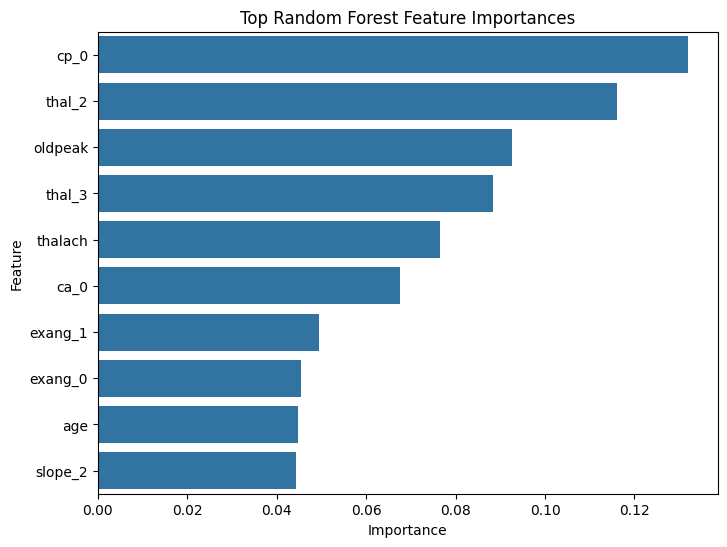

In [53]:
plt.figure(figsize=(8,6))
top = feature_importance_rf.head(10)
sns.barplot(data=top, x='importance', y='feature')
plt.title("Top Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [54]:
import joblib

joblib.dump(best_rf, 'best_heart_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

**Conclusion**

This project has developed a comprehensive heart disease prediction system using a number of classification algorithms through machine learning methods. The goal was to develop a machine learning predictive model to identify heart disease risk based on several different types of medical information about patients including their age, the number of times they have been treated for high blood pressure, the number of times their cholesterol is elevated, the number of times a patient has had chest pain, and many other clinical measures.

In addition to implementing Logistic Regression, Decision Trees, Random Forests and MLPClassifier Neural Networks using the scikit-learn library, a full machine learning pipeline was implemented including data preparation and preprocessing, feature encoding, normalizing, Exploratory Data Analysis (EDA), training and evaluating models.

Data Sets (Training and Testing) were split for unbiased evaluation of all models developed. Model evaluation used general classification measures such as accuracy, precision, recall F1 score and ROC-AUC.

The Random Forest Classifier had the best performance out of all of these developed models, achieving the highest accuracy and generalization performance compared to the other methods. Therefore, this demonstrates that ensemble learning techniques are well-suited for predicting medical ailing conditions. Additionally, the MLPClassifier Neural Network produced good performance as well supporting that predictive analytic Artificial Intelligence (AI) systems are able to model complex patterns in health care data.

In addition, the analysis of feature importance proved chest pain severity is an predictor of heart disease.

**Dataset Link**

https://drive.google.com/file/d/1k3Yhgzrgzl9CbdGXuZvK7WgbZ8kVx56I/view?
